c:\Users\SEC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\SEC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Mean Absolute Error =  55.698326986164496


c:\Users\SEC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\SEC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


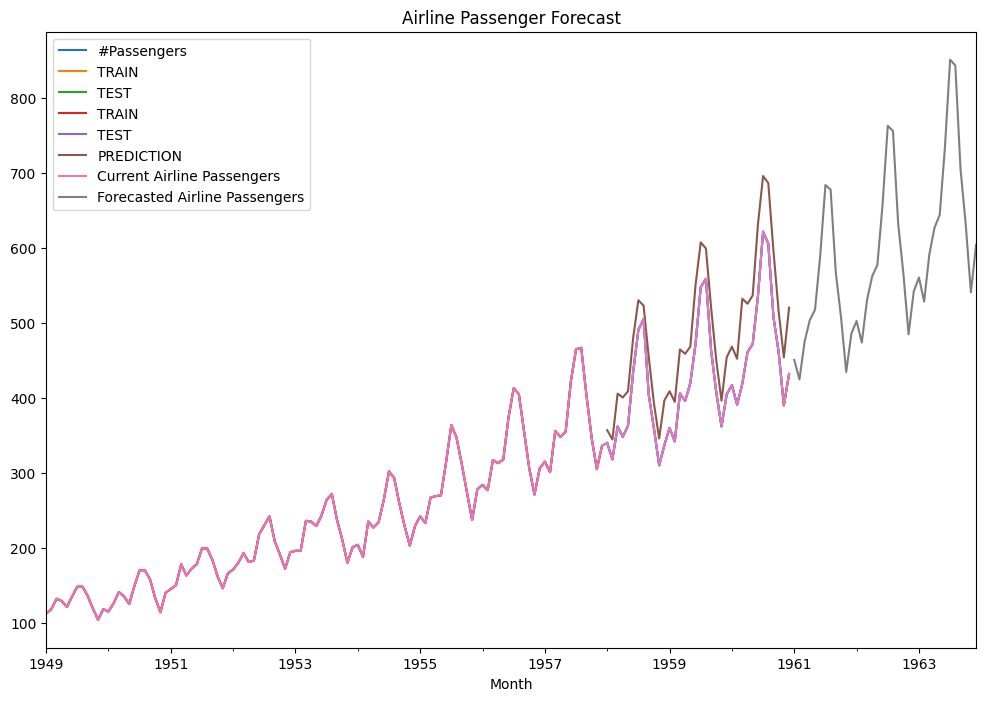

In [1]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error
import pandas as pd

airline  = pd.read_csv('AirPassengers.csv',index_col='Month',parse_dates=True)
airline.plot()
airline.freq = 'MS'
airline.index
len(airline)

train_airline = airline[:108] 
test_airline = airline[108:] 
fitted_model = ExponentialSmoothing(train_airline['#Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(36).rename('HW Test Forecast')

test_predictions[:10]
train_airline['#Passengers'].plot(legend=True,label='TRAIN')
test_airline['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
plt.title('Train and Test Data');

train_airline['#Passengers'].plot(legend=True,label='TRAIN')
test_airline['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters');
print("Mean Absolute Error = ",mean_absolute_error(test_airline,test_predictions))

final_model = ExponentialSmoothing(airline['#Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
forecast_predictions = final_model.forecast(steps=36)

airline['#Passengers'].plot(figsize=(12,8),legend=True,label='Current Airline Passengers')
forecast_predictions.plot(legend=True,label='Forecasted Airline Passengers')
plt.title('Airline Passenger Forecast');

EX.1B

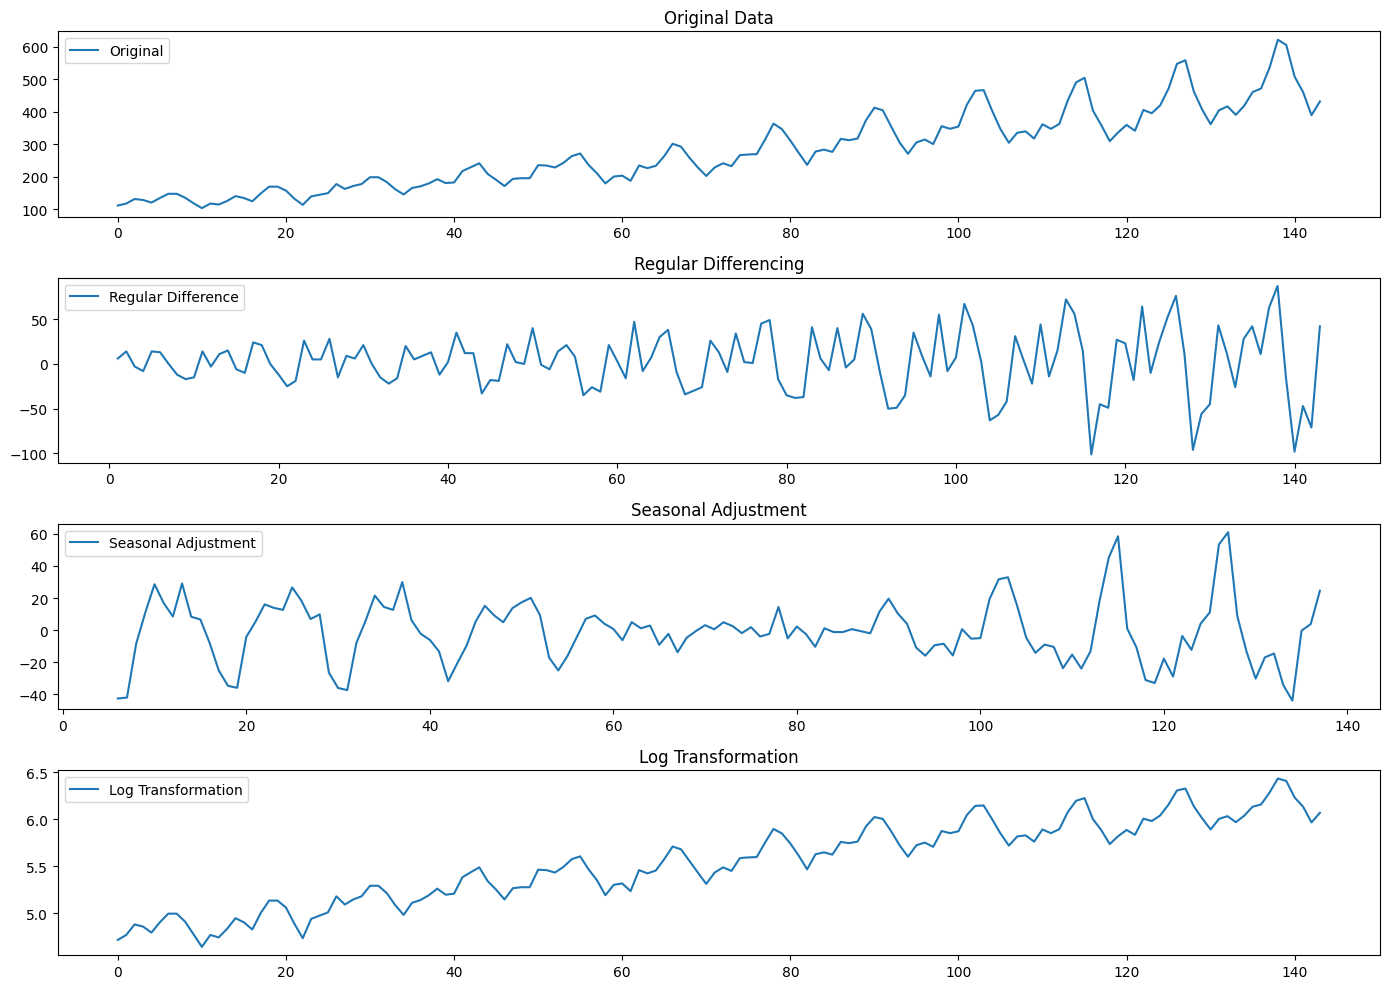

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
data = pd.read_csv("AirPassengers.csv")
# Create DataFrame
df = pd.DataFrame(data)

# Regular differencing
df['Regular Difference'] = df['#Passengers'].diff()

# Seasonal adjustment
result = seasonal_decompose(df['#Passengers'], model='additive', period=12)
df['Seasonal Adjustment'] = result.resid

# Log transformation
df['Log Transformation'] = np.log(df['#Passengers'])

# Plotting
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(df['#Passengers'], label='Original')
plt.legend(loc='best')
plt.title('Original Data')

plt.subplot(4, 1, 2)
plt.plot(df['Regular Difference'], label='Regular Difference')
plt.legend(loc='best')
plt.title('Regular Differencing')

plt.subplot(4, 1, 3)
plt.plot(df['Seasonal Adjustment'], label='Seasonal Adjustment')
plt.legend(loc='best')
plt.title('Seasonal Adjustment')

plt.subplot(4, 1, 4)
plt.plot(df['Log Transformation'], label='Log Transformation')
plt.legend(loc='best')
plt.title('Log Transformation')

plt.tight_layout()
plt.show()